# Klasifikasi menggunakan KNN

Notebook ini merupakan bagian dari buku **Machine Learning menggunakan Python** oleh **Fahmi Noor Fiqri**. Notebook ini berisi contoh kode untuk **BAB V - K-NEAREST NEIGHBOR**

## Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_validate

In [2]:
# Membaca data dari file CSV
df = pd.read_csv(r'../datasets/iris.csv')

In [3]:
# Memisahkan features dan label
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

In [4]:
# Melakukan label encoding
lb = LabelEncoder()
y = lb.fit_transform(y)

## Modelling & Evaluation

In [14]:
# Membuat model decision tree
classifier = Pipeline([
    ('normalize', StandardScaler()),
    ('classify', DecisionTreeClassifier(random_state=42, max_depth=3))
])

In [15]:
# Melakukan prediksi dengan data uji dan menampilkan statistik klasifikasi
scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"]
scores = cross_validate(classifier, X, y, scoring=scoring, cv=5, return_estimator=True)

accuracy_mean = np.mean(scores["test_accuracy"])
accuracy_std  = np.std(scores["test_accuracy"])
print("Akurasi {:.2f} - Standar deviasi {:.2f}".format(accuracy_mean, accuracy_std))

cols = ["fit_time", "score_time", "classifier", *scoring]
cv_result = pd.DataFrame.from_records(zip(*scores.values()), columns=cols)
cv_result.drop("classifier", axis=1).round(4)

Akurasi 0.97 - Standar deviasi 0.02


,fit_time,score_time,accuracy,precision_macro,recall_macro,f1_macro
0,0.0011,0.0029,0.9667,0.9697,0.9667,0.9666
1,0.0009,0.0018,0.9667,0.9697,0.9667,0.9666
2,0.0009,0.0024,0.9333,0.9444,0.9333,0.9327
3,0.0011,0.0033,1.0000,1.0000,1.0000,1.0000
4,0.0012,0.0023,1.0000,1.0000,1.0000,1.0000


In [19]:
# Mendapatkan model klasifikasi terbaik dari cross-validation
best_classifier_index = scores["test_accuracy"].argmax()
best_classifier = scores["estimator"][best_classifier_index]

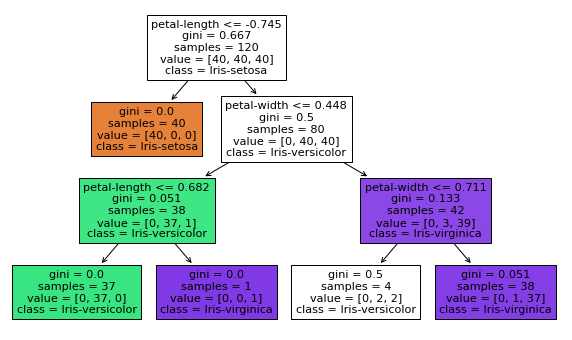

In [17]:
# Menampilkan tree
plt.figure(figsize=(10, 6))
tree_classifier = best_classifier.steps[1][1]
plot_tree(tree_classifier, feature_names=df.columns.values[:-1], class_names=lb.classes_, filled=True)
plt.show()

In [18]:
# Prediksi data baru
pred_input = [[3.0, 1.2, 2.4, 1.1]]        # input data

probabilities = best_classifier.predict_proba(pred_input)    # hitung probabilitas
predicted = best_classifier.predict(pred_input)              # prediksi kelas

print("Probabilitas:", probabilities)
print("Hasil klasifikasi:", lb.inverse_transform(predicted))

Probabilitas: [[1. 0. 0.]]
Hasil klasifikasi: ['Iris-setosa']
